In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle

In [3]:
df1=pd.read_pickle('/kaggle/input/bcdtrainv2/train_v2.pkl')
df1.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,machine_id,difficult_negative_case
0,2,10006,462822612,0,CC,61.0,0,0,0,0.0,0,29,False
1,2,10006,1459541791,0,MLO,61.0,0,0,0,0.0,0,29,False
2,2,10006,1864590858,1,MLO,61.0,0,0,0,0.0,0,29,False
3,2,10006,1874946579,1,CC,61.0,0,0,0,0.0,0,29,False
4,2,10011,220375232,0,CC,55.0,0,0,0,0.0,0,21,True


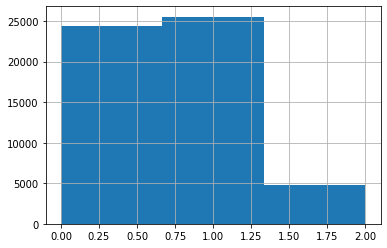

In [4]:
hist = df1['BIRADS'].hist(bins=3)

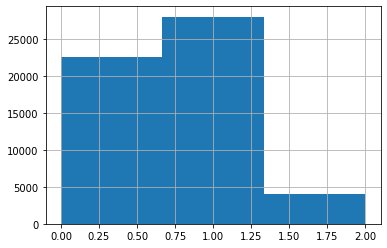

In [5]:
df1['BIRADS']=df1['BIRADS'].round(0).astype(int)
# df1['BIRADS'].unique()
hist = df1['BIRADS'].hist(bins=3)

BIRADS FIXED

In [12]:
# df1['difficult_negative_case'].values

array([False, False, False, ..., False,  True,  True])

In [28]:
df1['difficult_negative_case']=df1['difficult_negative_case'].replace([False,True], [int(0),int(1)])


difficult_negative_case fixed. True:False = 1:0

In [14]:
for column in df1:
#     print(df1[column].values().unique(),flush=False)
    print(column,':',df1[column].unique(),type(df1[column]) ,flush = False)

site_id : [2 1] <class 'pandas.core.series.Series'>
patient_id : [10006 10011 10025 ...   997  9973  9989] <class 'pandas.core.series.Series'>
image_id : [ 462822612 1459541791 1864590858 ... 1078943060  398038886  439796429] <class 'pandas.core.series.Series'>
laterality : [0 1] <class 'pandas.core.series.Series'>
view : ['CC' 'MLO' 'ML' 'LM' 'AT' 'LMO'] <class 'pandas.core.series.Series'>
age : [61.       55.       75.       60.       51.       62.       52.
 67.       53.       38.       44.       40.       57.       56.
 71.       58.       46.       76.       68.       69.       54.
 59.       64.       50.       73.       70.       65.       45.
 63.       47.       66.       72.       82.       49.       77.
 85.       79.       78.       74.       41.       43.       48.
 83.       42.       89.       80.       86.       58.543928 84.
 39.       81.       36.       88.       37.       28.       87.
 32.       35.       34.       26.       30.       31.       33.
 29.      ] <cl

In [29]:
df1

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,machine_id,difficult_negative_case
0,2,10006,462822612,0,CC,61.0,0,0,0,0,0,29,1
1,2,10006,1459541791,0,MLO,61.0,0,0,0,0,0,29,1
2,2,10006,1864590858,1,MLO,61.0,0,0,0,0,0,29,1
3,2,10006,1874946579,1,CC,61.0,0,0,0,0,0,29,1
4,2,10011,220375232,0,CC,55.0,0,0,0,0,0,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,1,MLO,43.0,0,0,0,1,0,49,1
54702,1,9989,63473691,0,MLO,60.0,0,0,0,1,0,216,1
54703,1,9989,1078943060,0,CC,60.0,0,0,0,0,0,216,1
54704,1,9989,398038886,1,MLO,60.0,0,0,0,0,0,216,0


Checking data types of all values

In [30]:
for column in df1:
    print(column, type(column), flush=False)

site_id <class 'str'>
patient_id <class 'str'>
image_id <class 'str'>
laterality <class 'str'>
view <class 'str'>
age <class 'str'>
cancer <class 'str'>
biopsy <class 'str'>
invasive <class 'str'>
BIRADS <class 'str'>
implant <class 'str'>
machine_id <class 'str'>
difficult_negative_case <class 'str'>


conversion to int

In [38]:
for column in df1:
    df1[column]=pd.to_numeric(df1[column], errors='ignore')
    print(column, flush=False)


site_id
patient_id
image_id
laterality
view
age
cancer
biopsy
invasive
BIRADS
implant
machine_id
difficult_negative_case


In [41]:
try:
    df1 = df1.astype('int')
except:
    pass

In [43]:
df1.dtypes

site_id                      int64
patient_id                   int64
image_id                     int64
laterality                   int64
view                        object
age                        float64
cancer                       int64
biopsy                       int64
invasive                     int64
BIRADS                       int64
implant                      int64
machine_id                   int64
difficult_negative_case      int64
dtype: object

In [44]:
df1.to_pickle(path='./train_v3.pkl')